In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

data = pd.read_csv('data.csv')
data.sample()

,DIST_NAME,Children under age 5 years who are stunted (%) Raw,Children under age 5 years who are stunted (%) N. Value,Pregnant women aged 15-49 years who are anaemic (Hb<11.0 g/dl) (%) Raw Data,Pregnant women aged 15-49 years who are anaemic (Hb<11.0 g/dl) (%) N. Value,Percentage of children aged 6-59 months who are anaemic (Hb<11.0 g/dl) Raw Data,Percentage of children aged 6-59 months who are anaemic (Hb<11.0 g/dl) N. Value,Children under five years who are underweight (Weight for age)(%) Raw Data,Children under five years who are underweight (Weight for age)(%) N. Value,"Average Yield (in Kg/Hect.) Rice, Wheat & Coarse Cereals Raw Data","Average Yield (in Kg/Hect.) Rice, Wheat & Coarse Cereals N. Value",Gross Value Added in Agriculture per worker (in lakh) Raw Data,Gross Value Added in Agriculture per worker (in lakh) N. Value,Goal 2 Score,Latitude,Longitude
2,Banswara,50.0,8.3,68.7,9.56,84.6,0.0,50.7,7.26,1919,42.71,0.28,0.0,11.31,23.5461,74.435


In [16]:
nb = 'shapefile\RAjasthan_admin_Dist_Boundary.shp'
regions = gpd.read_file(nb)
regions.sample(1)



,DIST_NAME,DIST_CODE,STATE_NAME,STATE_CODE,TRU,NO_HH,TOT_P,TOT_M,TOT_F,P_06,...,MARG_HH_0_,MARG_HH_02,MARG_HH_03,MARG_OT_0_,MARG_OT_02,MARG_OT_03,NON_WORK_P,NON_WORK_M,NON_WORK_F,geometry
6,Jaisalmer,114,Rajasthan,08,Total,117171.0,669919.0,361708.0,308211.0,130463.0,...,412.0,121.0,291.0,5704.0,1687.0,4017.0,381016.0,179143.0,201873.0,"POLYGON Z ((72.34443 27.69184 0.00000, 72.3426..."


In [17]:
merged = regions.set_index('DIST_NAME').join(data.set_index('DIST_NAME'))
merged = merged.reset_index()
merged = merged.fillna(0)
merged[["DIST_NAME","Goal 2 Score"]].all

<bound method DataFrame.all of          DIST_NAME  Goal 2 Score
0       Ganganagar         71.10
1      Hanumangarh         74.90
2          Bikaner         54.05
3       Jhunjhunun         55.77
4            Sikar         55.34
5          Jodhpur         38.14
6        Jaisalmer         46.13
7           Barmer         28.95
8            Jalor         25.27
9            Ajmer         36.97
10        Bhilwara         28.86
11       Dungarpur         14.49
12        Banswara         11.31
13            Kota         46.44
14           Baran         36.70
15        Jhalawar         29.14
16      Pratapgarh         29.48
17           Churu         43.73
18            Pali         31.16
19          Sirohi         31.85
20    Chittaurgarh         31.59
21         Udaipur         16.49
22       Rajsamand         25.31
23          Nagaur         41.34
24  Sawai Madhopur         49.72
25           Alwar         45.05
26       Bharatpur         41.80
27        Dhaulpur         38.66
28          

c:\Users\Anuj\Desktop\heatmap\venv\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  del sys.path[0]


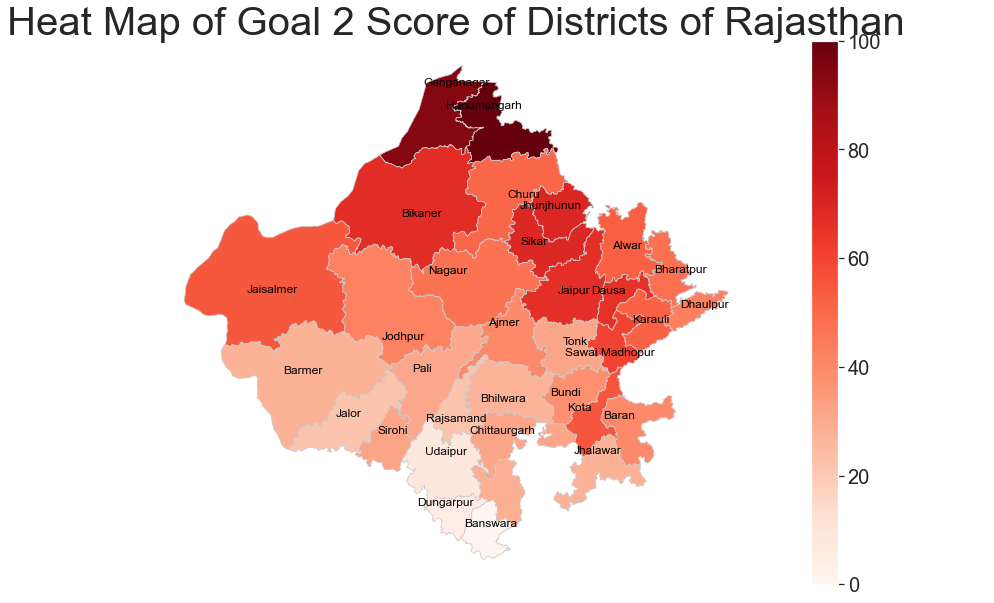

In [18]:
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Heat Map of Goal 2 Score of Districts of Rajasthan', fontdict={'fontsize': '40', 'fontweight' : '3'})
color = 'Reds'
vmin, vmax = 0, 100
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('Goal 2 Score', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(20,10))
for idx, row in merged.iterrows():
    plt.annotate(s=row['DIST_NAME'], xy=(row['Longitude'],row['Latitude']),
            horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()